In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

npre_df = pd.read_csv('npretrained.csv')
pre_df = pd.read_csv('pretrained.csv')

In [ ]:
pre_df.dtypes

model             object
Alexnet           object
Alexnet.1         object
Densnet           object
Densnet.1         object
Efficientnet      object
Efficientnet.1    object
Mnasnet           object
Mnasnet.1         object
Resnet            object
Resnet.1          object
Vgg               object
Vgg.1             object
Vit               object
Vit.1             object
dtype: object

In [ ]:
pre_df = pre_df.drop(pre_df.index[0])
npre_df = npre_df.drop(npre_df.index[0])

In [ ]:
pre_df

,model,Alexnet,Alexnet.1,Densnet,Densnet.1,Efficientnet,Efficientnet.1,Mnasnet,Mnasnet.1,Resnet,Resnet.1,Vgg,Vgg.1,Vit,Vit.1
1,0,89.07,83.04,93.84,88.44,88.32,87.81,84.55,84.8,87.56,85.05,85.8,82.29,80.15,79.15
2,1,88.95,86.53,94.41,95.43,93.77,94.16,88.82,86.79,95.04,94.66,92.5,93.27,91.23,90.22
3,2,77.91,75.1,81.23,80.46,78.29,76.5,73.18,72.8,78.54,76.63,75.48,75.35,75.22,73.95
4,3,86.6,85.29,93.14,94.44,91.5,91.83,83.66,78.4,91.83,92.48,87.25,83.66,63.73,78.76
5,4,80.49,81.3,NaN,85.37,83.74,84.96,81.3,77.24,85.77,83.33,84.15,82.63,61.38,84.55


In [ ]:
pre_df = pre_df.astype('float')
pre_df = pre_df.fillna(86.99)
npre_df = npre_df.astype('float')


In [ ]:
pre_df = pre_df.drop(['model'], axis = 1)
npre_df = npre_df.drop(['model'], axis = 1)

In [ ]:
pre_df

,Alexnet,Alexnet.1,Densnet,Densnet.1,Efficientnet,Efficientnet.1,Mnasnet,Mnasnet.1,Resnet,Resnet.1,Vgg,Vgg.1,Vit,Vit.1
1,89.07,83.04,93.84,88.44,88.32,87.81,84.55,84.80,87.56,85.05,85.80,82.29,80.15,79.15
2,88.95,86.53,94.41,95.43,93.77,94.16,88.82,86.79,95.04,94.66,92.50,93.27,91.23,90.22
3,77.91,75.10,81.23,80.46,78.29,76.50,73.18,72.80,78.54,76.63,75.48,75.35,75.22,73.95
4,86.60,85.29,93.14,94.44,91.50,91.83,83.66,78.40,91.83,92.48,87.25,83.66,63.73,78.76
5,80.49,81.30,86.99,85.37,83.74,84.96,81.30,77.24,85.77,83.33,84.15,82.63,61.38,84.55


In [ ]:
models = pre_df.columns.astype('str')

for i in range(7):
    x = []
    a1 = pre_df[models[i * 2]].values
    a2 = pre_df[models[i * 2 + 1]].values
    a3 = npre_df[models[i * 2]].values
    a4 = npre_df[models[i*2+1]].values
    for j in range(5):
        temp = max(a1[j], a2[j], a3[j], a4[j])
        x.append(temp)
    print(x)

[92.84, 88.95, 77.91, 88.56, 81.71]
[93.84, 95.43, 81.23, 94.44, 86.99]
[88.32, 94.16, 78.29, 91.83, 84.96]
[85.3, 89.45, 74.58, 86.6, 82.11]
[87.56, 95.04, 78.54, 92.48, 85.77]
[86.68, 93.27, 75.48, 89.22, 84.15]
[80.15, 91.23, 75.22, 78.76, 84.55]


In [ ]:
a1[0]

89.07

In [ ]:
pre_df[models[i * 2]].values.shape

(5,)

In [ ]:
max([1, 2, 3, 4, 5], [5, 6, 7, 8, 9], [4, 5, 5,6 ,4])

[5, 6, 7, 8, 9]

In [ ]:
title = ['각막궤양', '각막부골편', '결막염', '비궤양성각막염', '안검염']

In [ ]:
plt.figure(figsize = (192, 128))
plt.rc('font', size=150, weight="bold", family='NanumBarunGothic')
plt.rc('xtick', labelsize=150) 
plt.rc('ytick', labelsize=150)
idx = 0
for j in range(2):
    for i in range(2):
        area = plt.subplot(3, 2, idx+1)
        plt.grid(True, lw = 1)
        area.set_title(title[idx])
        type = pre_df.iloc[idx]
        type = type.drop('model')
        type = type.drop('Densnet')
        type = type.drop('Densnet.1')
        sns.barplot(['Alexnet', 'Alexnet', 'Efficientnet','Efficientnet', 'Mnasnet', 'Mnasnet', 'Resnet', 'Resnet', 'Vgg',
            'Vgg', 'Vit', 'Vit'], type.values, hue = ['n', 'y']*6)    
        plt.ylim(type.values.min() - 2 , type.values.max() + 2)
        idx += 1
area = plt.subplot(3, 2, idx+1)
plt.grid(True, lw = 1)
type = pre_df.iloc[idx]
area.set_title(title[idx])
type = type.drop('model')
type = type.drop('Densnet')
type = type.drop('Densnet.1')
sns.barplot(['Alexnet', 'Alexnet', 'Efficientnet','Efficientnet', 'Mnasnet', 'Mnasnet', 'Resnet', 'Resnet', 'Vgg',
    'Vgg', 'Vit', 'Vit'], type.values, hue = ['n', 'y']*6)    
plt.ylim(type.values.min() - 2 , type.values.max() + 2)
idx += 1
plt.tight_layout()
plt.show()

In [ ]:
type

93.84

In [ ]:
plt.figure(figsize = (320, 40))
plt.rc('font', size=120, weight="bold", family='NanumBarunGothic')
plt.rc('xtick', labelsize=120) 
plt.rc('ytick', labelsize=120)
for i in range(5):
    plt.subplot(1, 5, i+1)
    type = pre_df.iloc[i]
    type = type['Densnet']
    type = type['Densnet.1']
    sns.barplot(['Desnet', 'Densenet'], type.values, hue = ['n', 'y'])

    plt.ylim(type.values.min() - 2 , type.values.max() + 2)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('resdens.csv')
df = df.astype('float')

In [ ]:
print(df)

   Densenet161  Resnet152
0       91.140     86.305
1       94.920     94.850
2       80.845     77.585
3       93.790     92.155
4       86.180     84.550


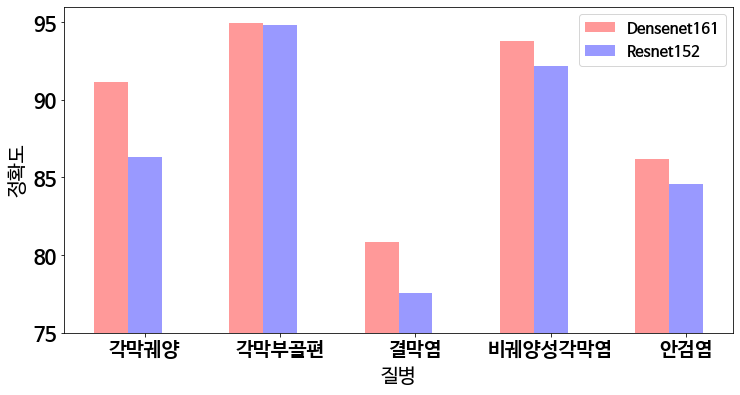

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['Densenet161'], bar_width, alpha=0.4, color='red', label='Densenet161')

b2 = plt.bar(index + bar_width, df['Resnet152'], bar_width, alpha=0.4, color='blue', label='Resnet152')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 5 + bar_width, 1), title)
plt.rc('font', weight="bold", family='NanumBarunGothic')
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
# x축, y축 이름 및 범례 설정
plt.xlabel('질병', size = 20)
plt.ylabel('정확도', size = 20)
plt.legend(loc = 'upper right', fontsize = 15)
plt.ylim(75 , 96)
plt.show()

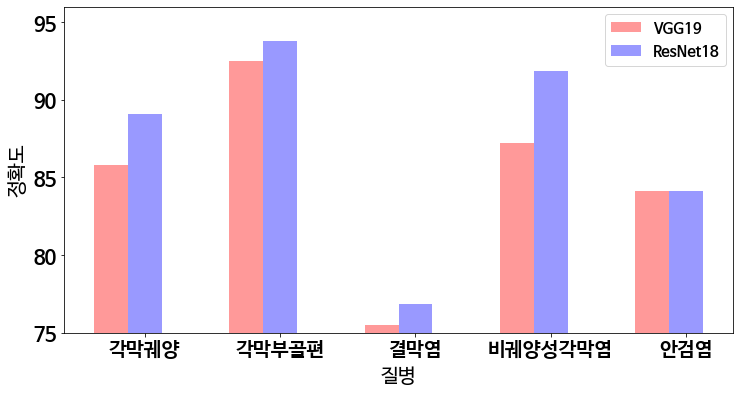

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('resvgg.csv')
df = df.astype('float')
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['vgg19'], bar_width, alpha=0.4, color='red', label='VGG19')

b2 = plt.bar(index + bar_width, df['resnet18'], bar_width, alpha=0.4, color='blue', label='ResNet18')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 5 + bar_width, 1), title)
plt.rc('font', weight="bold", family='NanumBarunGothic')
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
# x축, y축 이름 및 범례 설정
plt.xlabel('질병', size = 20)
plt.ylabel('정확도', size = 20)
plt.legend(loc = 'upper right', fontsize = 15)
plt.ylim(75 , 96)
plt.show()